In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Owner\Documents\techtern datas\Marketing_Data.csv")

In [3]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [4]:
df.dtypes

Income                  int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
Age                     int64
Customer_Days           int64
marital_Divorced        int64
marital_Married         int64
marital_Single          int64
marital_Together        int64
marital_Widow           int64
education_2n Cycle      int64
education_Basic         int64
education_

In [5]:
df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [6]:
df.duplicated().sum()

184

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
age_bins = [0,20,30,40,50,90]
age_labels = ['<20', '20-29', '30-39','40-49','50+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Income

income_bins = [0, 25000, 50000, 75000, 200000]
income_labels = ['low_income', 'medium_low', 'medium_high', 'high_income']
df['Income_Group']= pd.cut(df['Income'], bins=income_bins, labels=income_labels)


In [17]:
# segmenting based on family size

# add all children

df['numKids'] = df['Kidhome'] + df['Teenhome']

In [18]:
df[['Kidhome', 'Teenhome','numKids' ]]

,Kidhome,Teenhome,numKids
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1
...,...,...,...
2198,0,0,0
2200,0,1,1
2202,0,0,0
2203,0,1,1


In [19]:
#Calculating total number of family

col2 = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
tFSize = []
for sample in df.values:
    numKids = sample[-1]
    
    if sample[26] == 1 or sample[28]==1 or sample[30]==1:
        tFSize.append(numKids+1)
    else: 
        tFSize.append(numKids+2)

In [21]:
df['fSize'] = tFSize

In [22]:
fSize = list(df.fSize)
fSeg = []
for val in fSize:
    if val == 1:
        fSeg.append('mono')
    elif val == 2:
        fSeg.append('duo')
    elif val == 3:
        fSeg.append('Triad')
    elif val == 4:
        fSeg.append('Tetra')
    else:
        fSeg.append('mega')

df['f_Seg'] = fSeg

In [23]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Age_Group,Income_Group,numKids,fSize,f_Seg
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,1529,1441,0,50+,medium_high,0,1,mono
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,21,15,0,50+,medium_low,2,3,Triad
2,71613,0,0,26,426,49,127,111,21,42,...,0,0,734,692,0,50+,medium_high,0,2,duo
3,26646,1,0,26,11,4,20,10,3,5,...,0,0,48,43,0,30-39,medium_low,1,3,Triad
4,58293,1,0,94,173,43,118,46,27,15,...,0,1,407,392,0,30-39,medium_high,1,3,Triad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816,0,0,50,5,1,6,3,4,3,...,0,0,19,16,0,30-39,medium_low,0,1,mono
2200,61223,0,1,46,709,43,182,42,118,247,...,0,0,1094,847,0,50+,medium_high,1,3,Triad
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,1217,1193,1,30-39,medium_high,0,1,mono
2203,69245,0,1,8,428,30,214,80,30,61,...,1,0,782,721,0,50+,medium_high,1,3,Triad


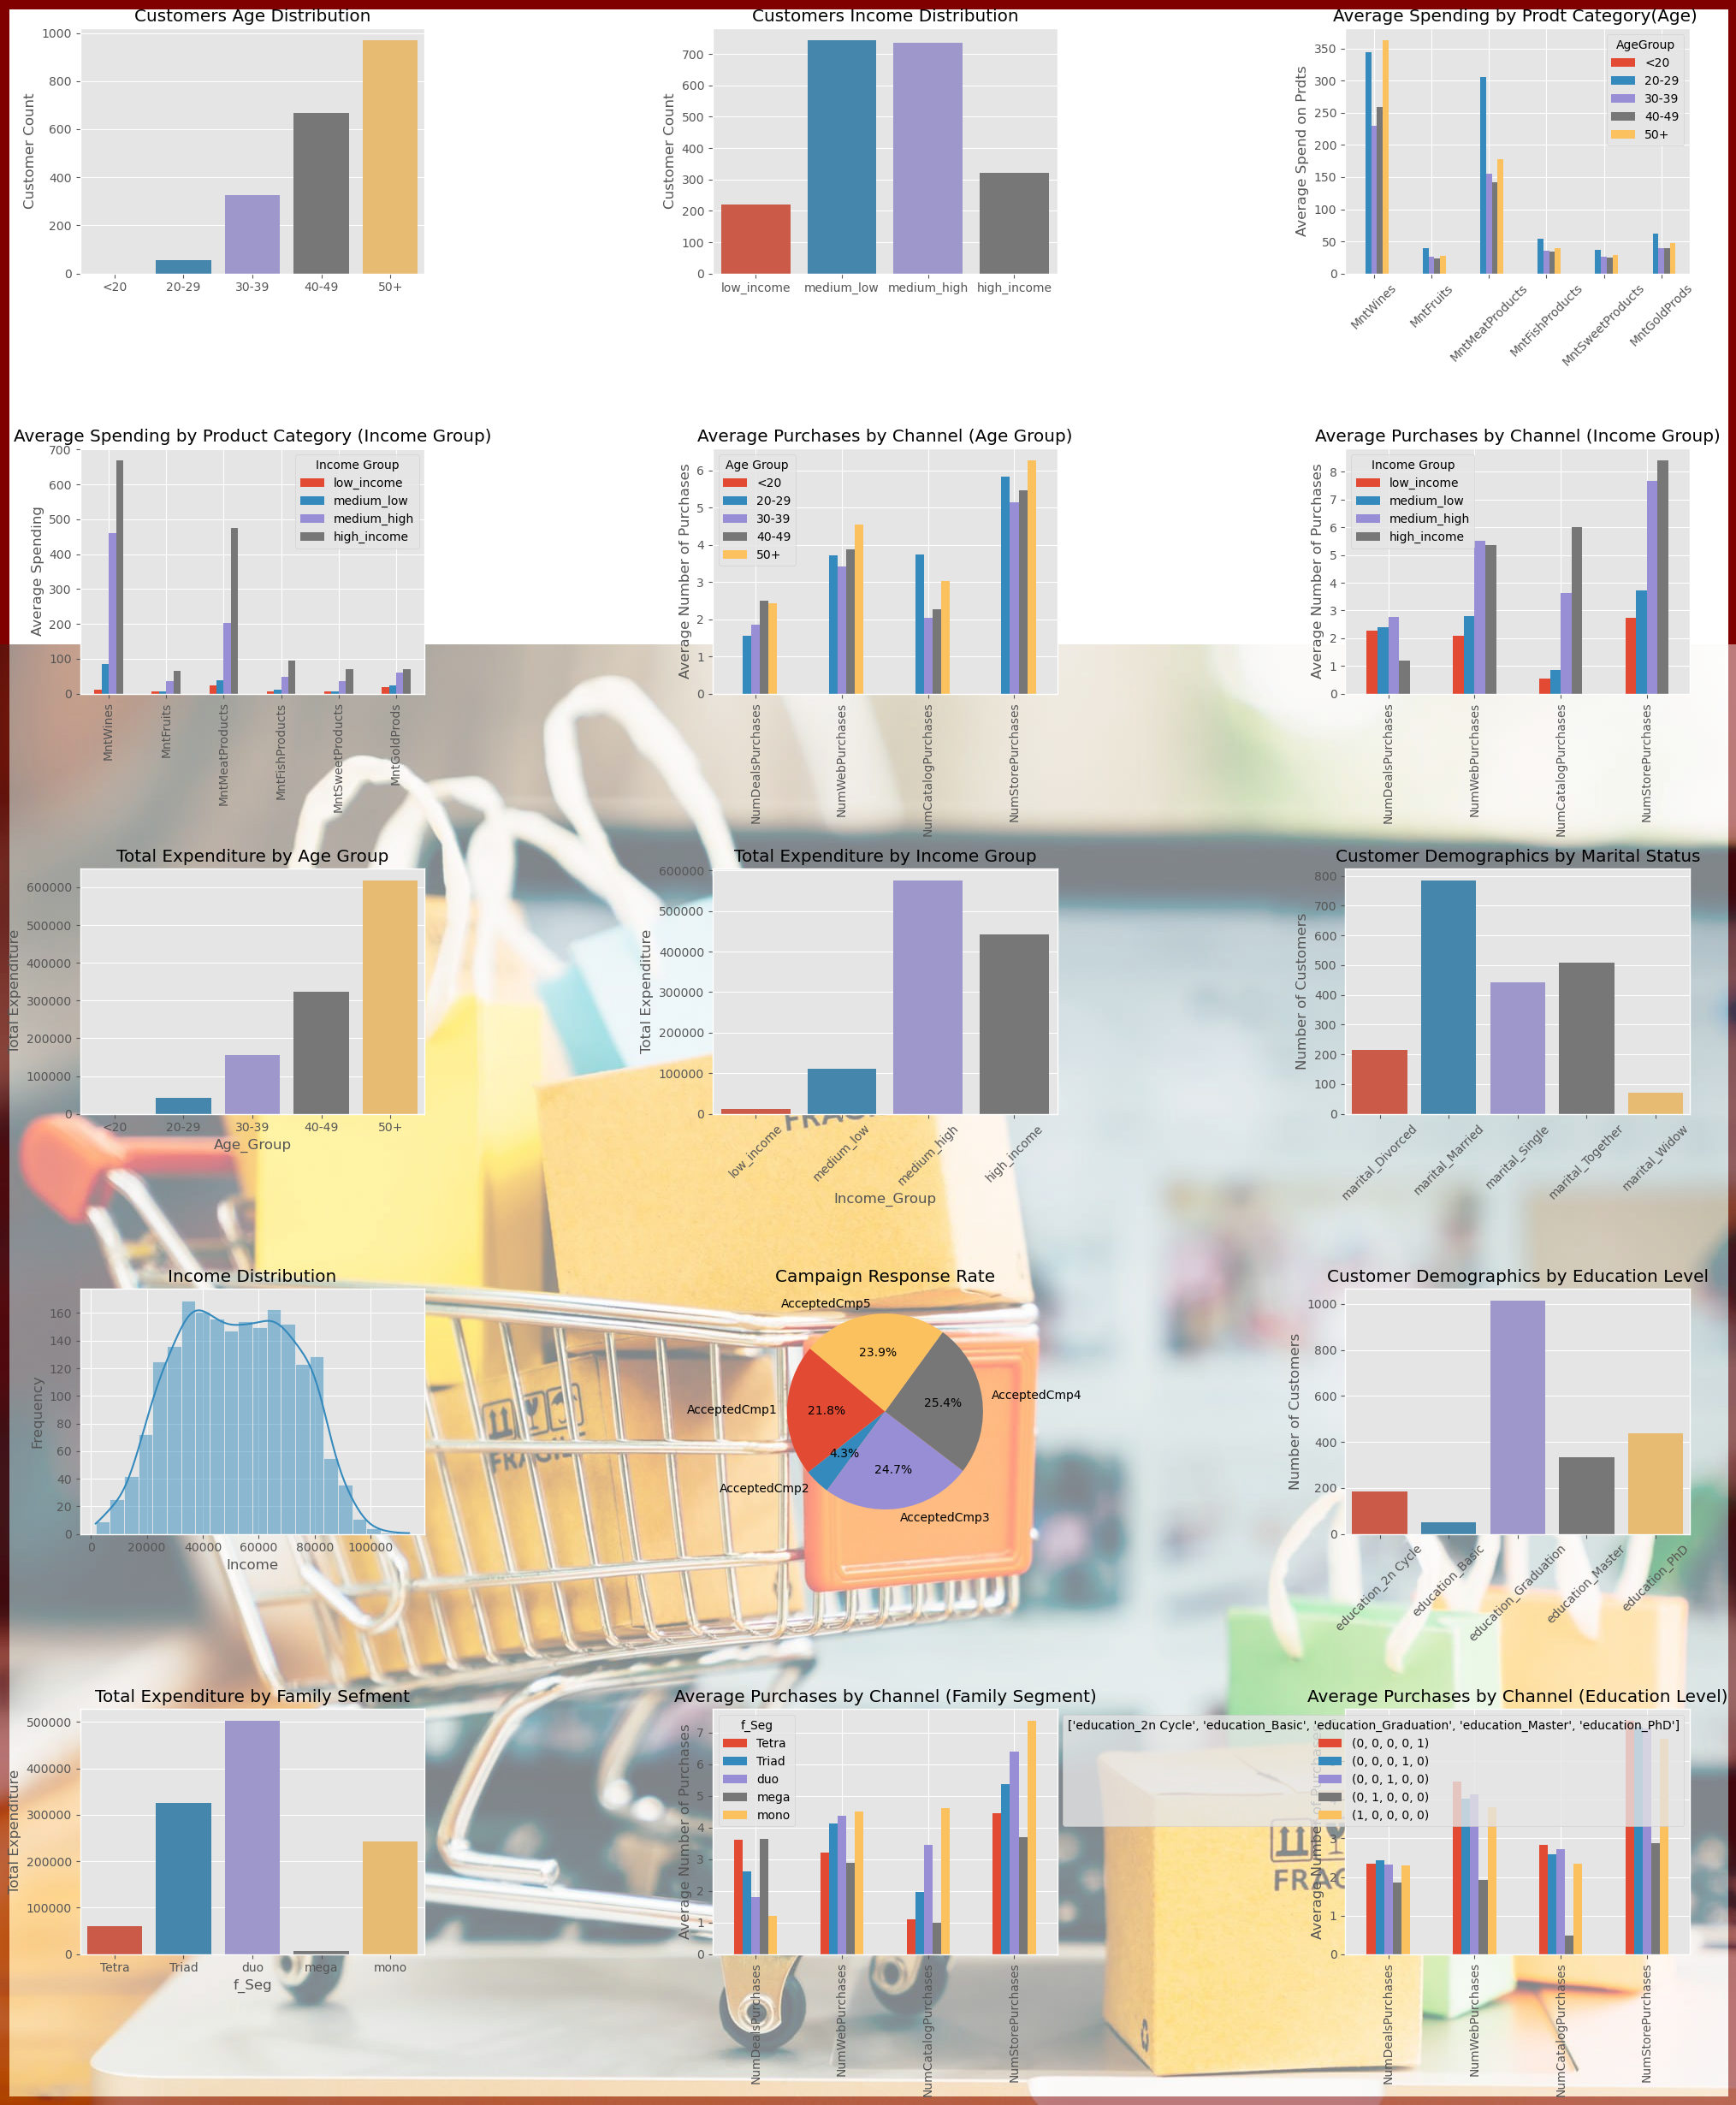

In [35]:
# Configure Plotting canvas
import matplotlib.image as mpimg
plt.style.use('ggplot')

# creating matplotlib subplot structure to hold our plots

fig, axes = plt.subplots(5,3, figsize=(20,26))
fig.subplots_adjust(top=0.85, bottom=0.15, left=0.2, hspace=0.8)

fig.patch.set_linewidth(15)
fig.patch.set_edgecolor('Maroon')


# setting the background image for the entire figure
background_image = mpimg.imread(r"C:\Users\Owner\Documents\FDA files\shopping.jpeg")
fig.figimage(background_image, xo=0, yo=0, alpha=0.5, zorder=-1)


# Distribution of age groups?
# Plot1
age_group_counts = df['Age_Group'].value_counts().sort_index()
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, ax=axes[0,0] )


axes[0,0].set_title('Customers Age Distribution', )
axes[0,0].set_ylabel('Customer Count', )


#Plot2
# Income distribution?
income_group_counts = df['Income_Group'].value_counts().sort_index()
sns.barplot(x=income_group_counts.index, y=income_group_counts.values, ax=axes[0,1] )

axes[0,1].set_title('Customers Income Distribution')
axes[0,1].set_ylabel('Customer Count')

# Plot 3
# Average spend per product group by different age segments

product_cats = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
avg_spend_Age = df.groupby('Age_Group')[product_cats].mean().transpose()
avg_spend_Age.plot(kind='bar', ax=axes[0,2], legend=False)
axes[0,2].set_title('Average Spending by Prodt Category(Age) ')
axes[0,2].set_ylabel('Average Spend on Prdts')
axes[0,2].legend(title='AgeGroup')
axes[0,2].tick_params(axis='x', rotation=45)

# Plot 4
# Average Spending by Product Category (Income Group)
product_categories = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
avg_spending_income = df.groupby('Income_Group')[product_categories].mean().transpose()
avg_spending_income.plot(kind='bar', ax=axes[1,0], legend=False)
axes[1, 0].set_title('Average Spending by Product Category (Income Group)')
axes[1, 0].set_ylabel('Average Spending')
axes[1,0].legend(title='Income Group')


### Plot 5: Purchases by Channel

# Purchases by Channel (Age Group)
purchase_channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
avg_purchases_age = df.groupby('Age_Group')[purchase_channels].mean().transpose()
avg_purchases_age.plot(kind='bar', ax=axes[1,1], legend=False)
axes[1,1].set_title('Average Purchases by Channel (Age Group)')
axes[1,1].set_ylabel('Average Number of Purchases')
axes[1,1].legend(title='Age Group')

# Plot 6: 
#Purchases by Channel (Income Group)
avg_purchases_income = df.groupby('Income_Group')[purchase_channels].mean().transpose()
avg_purchases_income.plot(kind='bar', ax=axes[1,2], legend=False)
axes[1,2].set_title('Average Purchases by Channel (Income Group)')
axes[1,2].set_ylabel('Average Number of Purchases')
axes[1,2].legend(title='Income Group')


# Plot 7: Total Expenditure by Age Group
total_expenditure_age = df.groupby('Age_Group')['MntTotal'].sum()
sns.barplot(x=total_expenditure_age.index, y=total_expenditure_age.values, ax=axes[2, 0])
axes[2, 0].set_title('Total Expenditure by Age Group')
axes[2, 0].set_ylabel('Total Expenditure')

# Plot 8: Total Expenditure by Income Group
total_expenditure_income = df.groupby('Income_Group')['MntTotal'].sum()
sns.barplot(x=total_expenditure_income.index, y=total_expenditure_income.values, ax=axes[2, 1])
axes[2, 1].set_title('Total Expenditure by Income Group')
axes[2, 1].set_ylabel('Total Expenditure')
axes[2, 1].tick_params(axis='x', rotation=45)

# Plot 9: Customer Demographics - Marital Status
marital_status_cols = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
marital_status_counts = df[marital_status_cols].sum()
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values, ax=axes[2, 2])
axes[2, 2].set_title('Customer Demographics by Marital Status')
axes[2, 2].set_ylabel('Number of Customers')
axes[2, 2].tick_params(axis='x', rotation=45)


# Plot 10: Income Distribution
sns.histplot(df['Income'], kde=True, ax=axes[3,0])
axes[3,0].set_title('Income Distribution')
axes[3,0].set_xlabel('Income')
axes[3,0].set_ylabel('Frequency')



# Plot 11: Campaign Response
campaign_responses = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
axes[3, 1].pie(campaign_responses, labels=campaign_responses.index, autopct='%1.1f%%', startangle=140)
axes[3, 1].set_title('Campaign Response Rate')

# Plot 12: Customer Demographics - Education Level
education_level_cols = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
education_level_counts = df[education_level_cols].sum()
sns.barplot(x=education_level_counts.index, y=education_level_counts.values, ax=axes[3, 2])
axes[3, 2].set_title('Customer Demographics by Education Level')
axes[3, 2].set_ylabel('Number of Customers')
axes[3, 2].tick_params(axis='x', rotation=45)

#Plot 13  Total Expenditure by Family Group
total_expenditure_f_Seg = df.groupby('f_Seg')['MntTotal'].sum()
sns.barplot(x=total_expenditure_f_Seg.index, y=total_expenditure_f_Seg.values, ax=axes[4, 0])
axes[4, 0].set_title('Total Expenditure by Family Sefment')
axes[4, 0].set_ylabel('Total Expenditure')

#Plot 14  Purchases by Channel (Family Group)
total_expenditure_f_Seg = df.groupby('f_Seg')[purchase_channels].mean().transpose()
total_expenditure_f_Seg.plot(kind='bar', ax=axes[4,1], legend=False)
axes[4,1].set_title('Average Purchases by Channel (Family Segment)')
axes[4,1].set_ylabel('Average Number of Purchases')
axes[4,1].legend(title='f_Seg')

#Plot 15  Purchases by Channel(Educational Level)
total_expenditure_Edu_Level = df.groupby(education_level_cols)[purchase_channels].mean().transpose()
total_expenditure_Edu_Level.plot(kind='bar', ax=axes[4,2], legend=False)
axes[4,2].set_title('Average Purchases by Channel (Education Level)')
axes[4,2].set_ylabel('Average Number of Purchases')
axes[4,2].legend(title=education_level_cols)



plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the figure
plt.show()
